In [1]:
%cd /content/
!rm -rf /content/Busway-Traffic-Violation-Detection
!git clone https://github.com/ariqbasyar/Busway-Traffic-Violation-Detection.git\
  && cd /content/Busway-Traffic-Violation-Detection/\
  && git checkout experiment

/content
Cloning into 'Busway-Traffic-Violation-Detection'...
remote: Enumerating objects: 238, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 238 (delta 19), reused 83 (delta 16), pack-reused 150
Receiving objects: 100% (238/238), 78.07 MiB | 20.66 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Branch 'experiment' set up to track remote branch 'experiment' from 'origin'.
Switched to a new branch 'experiment'


In [2]:
%cd /content/Busway-Traffic-Violation-Detection/model/busway-lane-detection-yolo/

/content/Busway-Traffic-Violation-Detection/model/busway-lane-detection-yolo


In [3]:
!ls

example.ipynb  example.py  model.py  models  utils  weights


In [5]:
import sys
import os
import torch
import numpy as np
import cv2

from model import (preprocess, detect, box_label,
    get_busway_box_from_prediction)
from time import time
from pathlib import Path
from model.models.experimental import attempt_load
from shapely.geometry import MultiPoint

from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
ROOT = Path('/content/Busway-Traffic-Violation-Detection/model/busway-lane-detection-yolo')
WEIGHT = ROOT / 'weights'

In [7]:
weight = WEIGHT / 'best-yolov5m-400epochs.pt'

In [8]:
random_state = np.random.RandomState(42)

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'using {device}')
model = attempt_load(weight, map_location=device)

using cpu


Fusing layers... 
Model Summary: 308 layers, 21049761 parameters, 0 gradients


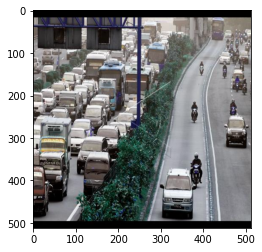

In [10]:
idx = '%03d.jpg' % random_state.randint(0,62)
main_img = cv2.imread(f'../../dataset/preprocessed_512x512/{idx}')
plt.imshow(main_img)
plt.show()

# Preprocess

In [11]:
preprocessed = preprocess(main_img,device)

# Detect

In [12]:
start = time()
pred, labels = detect(model,preprocessed)
print(f'inferenced in {(time() - start)*1E3:.2f}ms')

inferenced in 968.97ms


# Plot

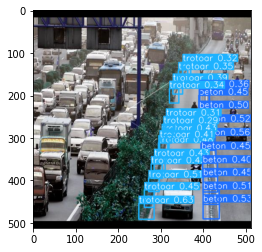

In [13]:
labeled_img = box_label(pred,main_img.copy(),labels)
plt.imshow(labeled_img)
plt.show()

# Extract by labels

amount of convex hull points: 9


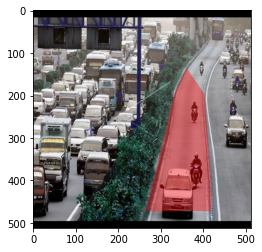

In [14]:
points = get_busway_box_from_prediction(pred)
print(f'amount of convex hull points: {len(points)}')
if points is None:
  print("Cant make polygon from the prediction")
else:
  _img = main_img.copy()
  cv2.fillPoly(_img, [points], (255,0,0))
  alpha = 0.4
  image_new = cv2.addWeighted(_img, alpha, main_img, 1 - alpha, 0)
  plt.imshow(image_new)
  plt.show()